In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/Aswin/Downloads/Employee-Attrition - Employee-Attrition.csv")

# DATA OVERVIEW

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

In [5]:
df.shape

(1470, 35)

# EDA

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Aswin\AppData\Local\Temp\ipykernel_12092\2128011031.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Attrition',palette='viridis') #Visualising the target


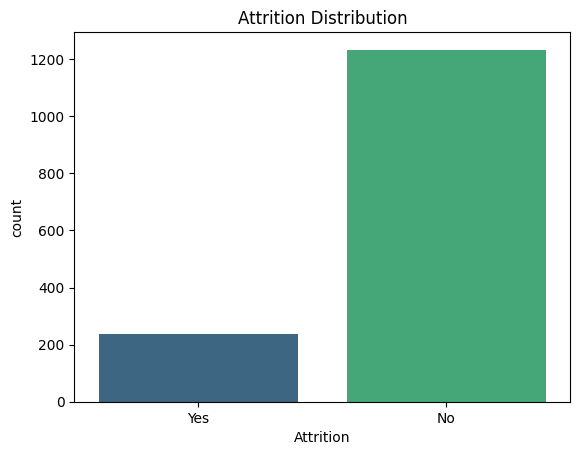

In [10]:
sns.countplot(data=df,x='Attrition',palette='viridis') #Visualising the target 
plt.title("Attrition Distribution")
plt.show()

Analysing the category columns

In [11]:
categorical_columns=df.select_dtypes(include='object').columns # checking the value count of each category 
for col in categorical_columns:
    print(f"\n {col} value counts:")
    print(df[col].value_counts())


 Attrition value counts:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

 BusinessTravel value counts:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

 Department value counts:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

 EducationField value counts:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

 Gender value counts:
Gender
Male      882
Female    588
Name: count, dtype: int64

 JobRole value counts:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resource

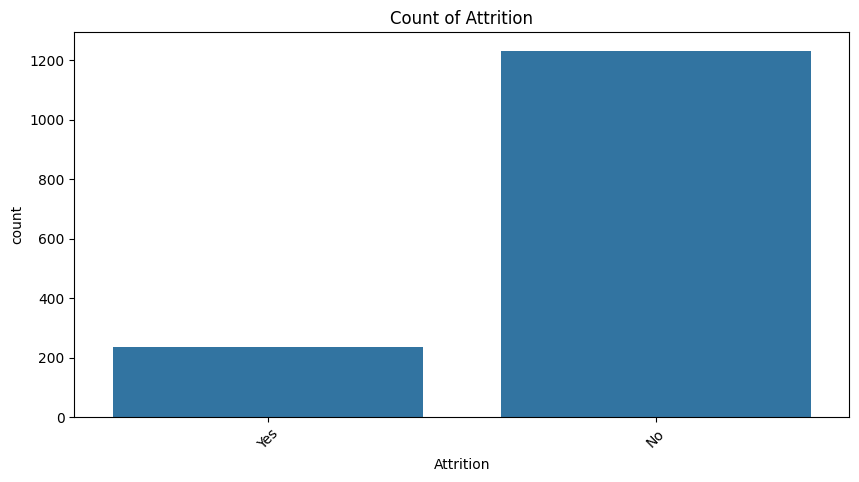

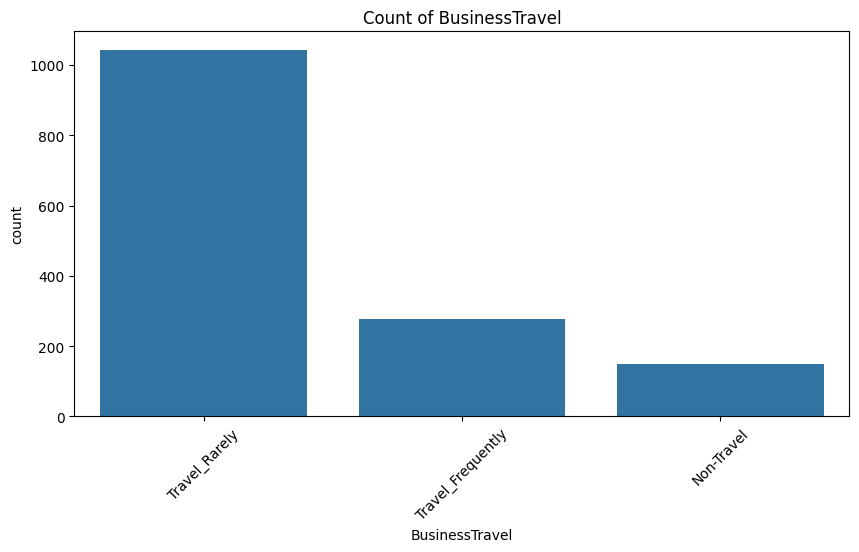

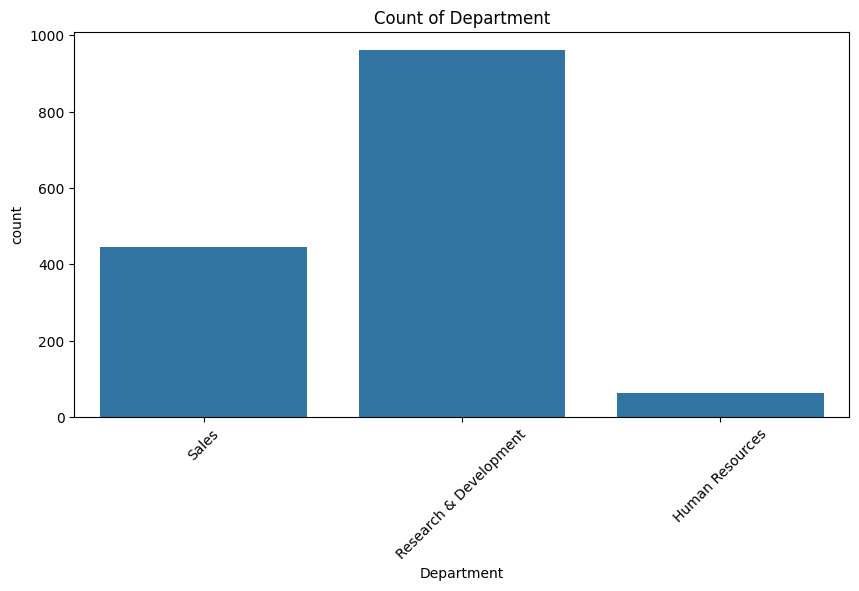

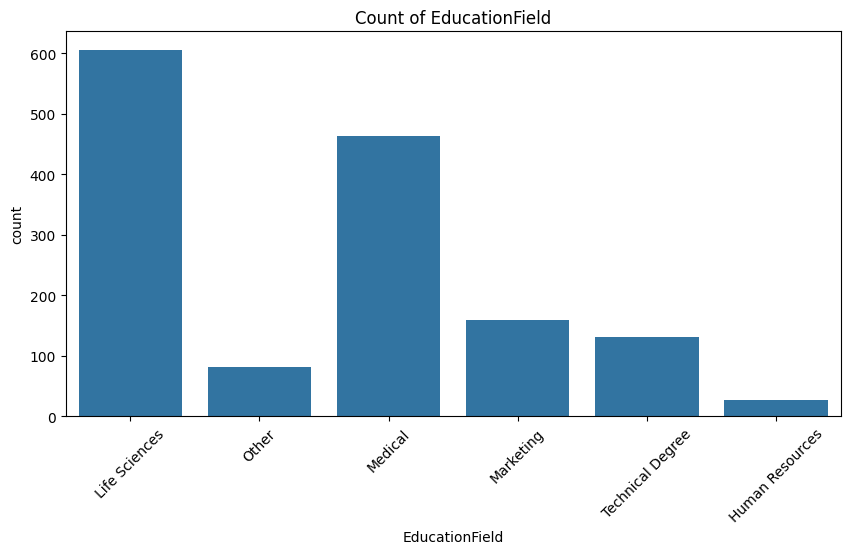

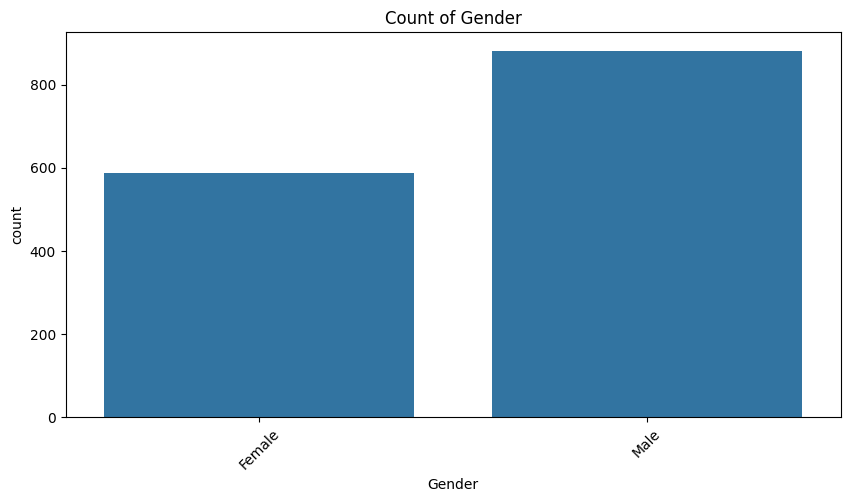

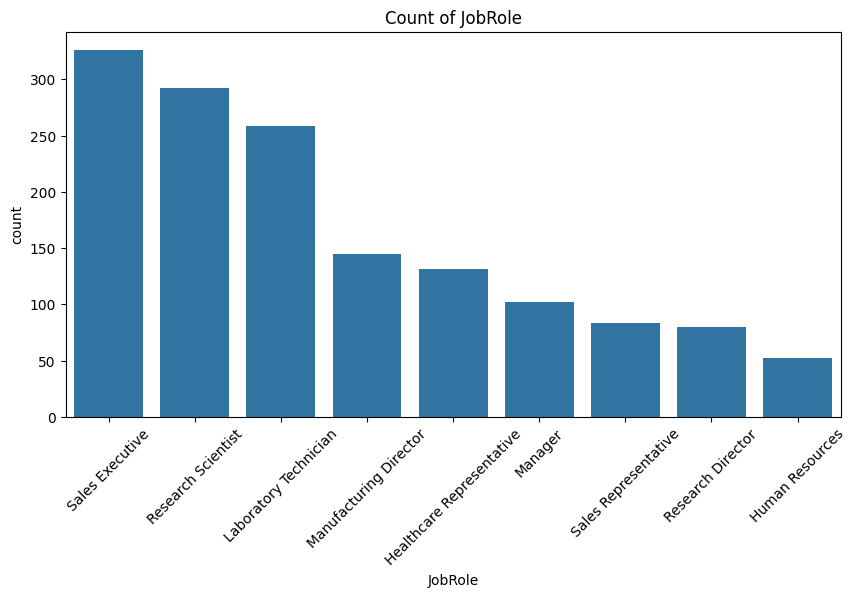

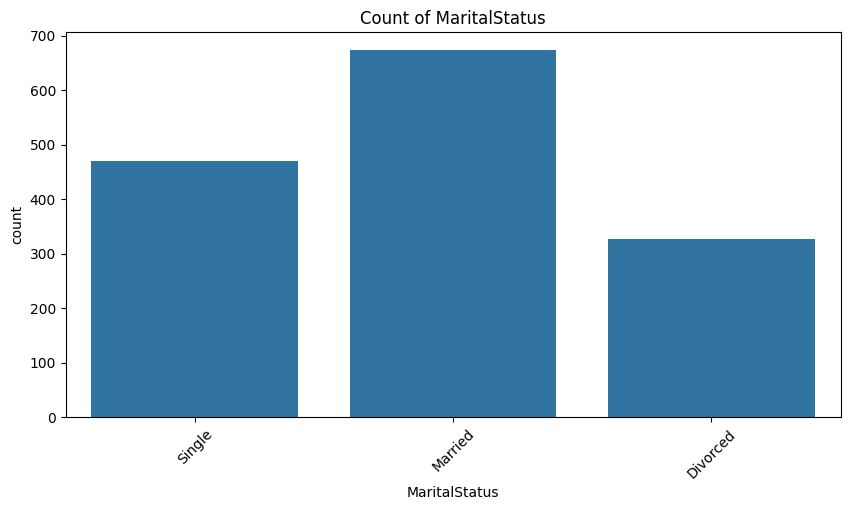

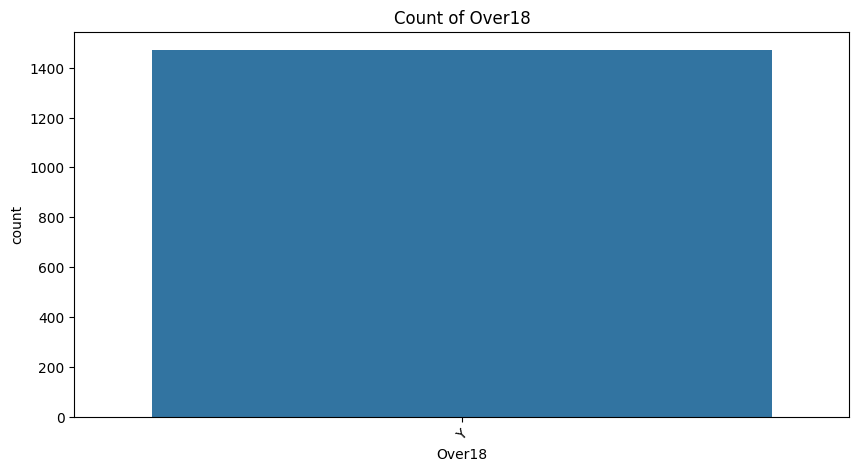

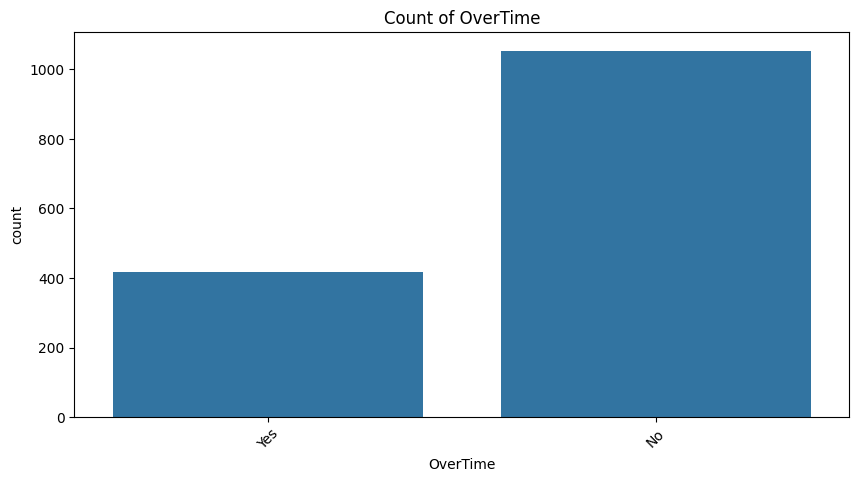

In [12]:
categorical_columns= df.select_dtypes(include=['object']).columns #visualising the category values
for feature in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.show()

Analysing Numerical columns

In [13]:
num_columns= df.select_dtypes(include=['int']).columns
print(num_columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


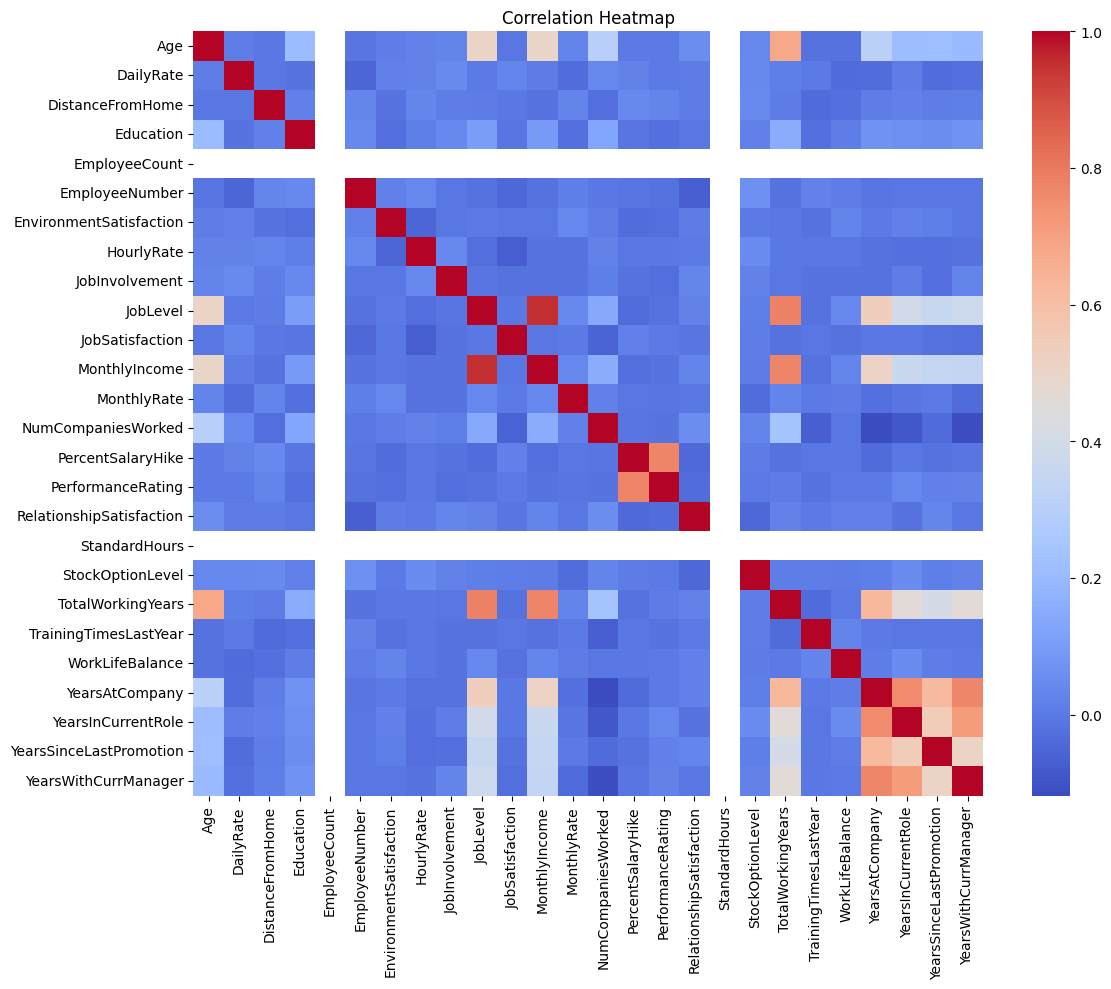

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Outlier detection

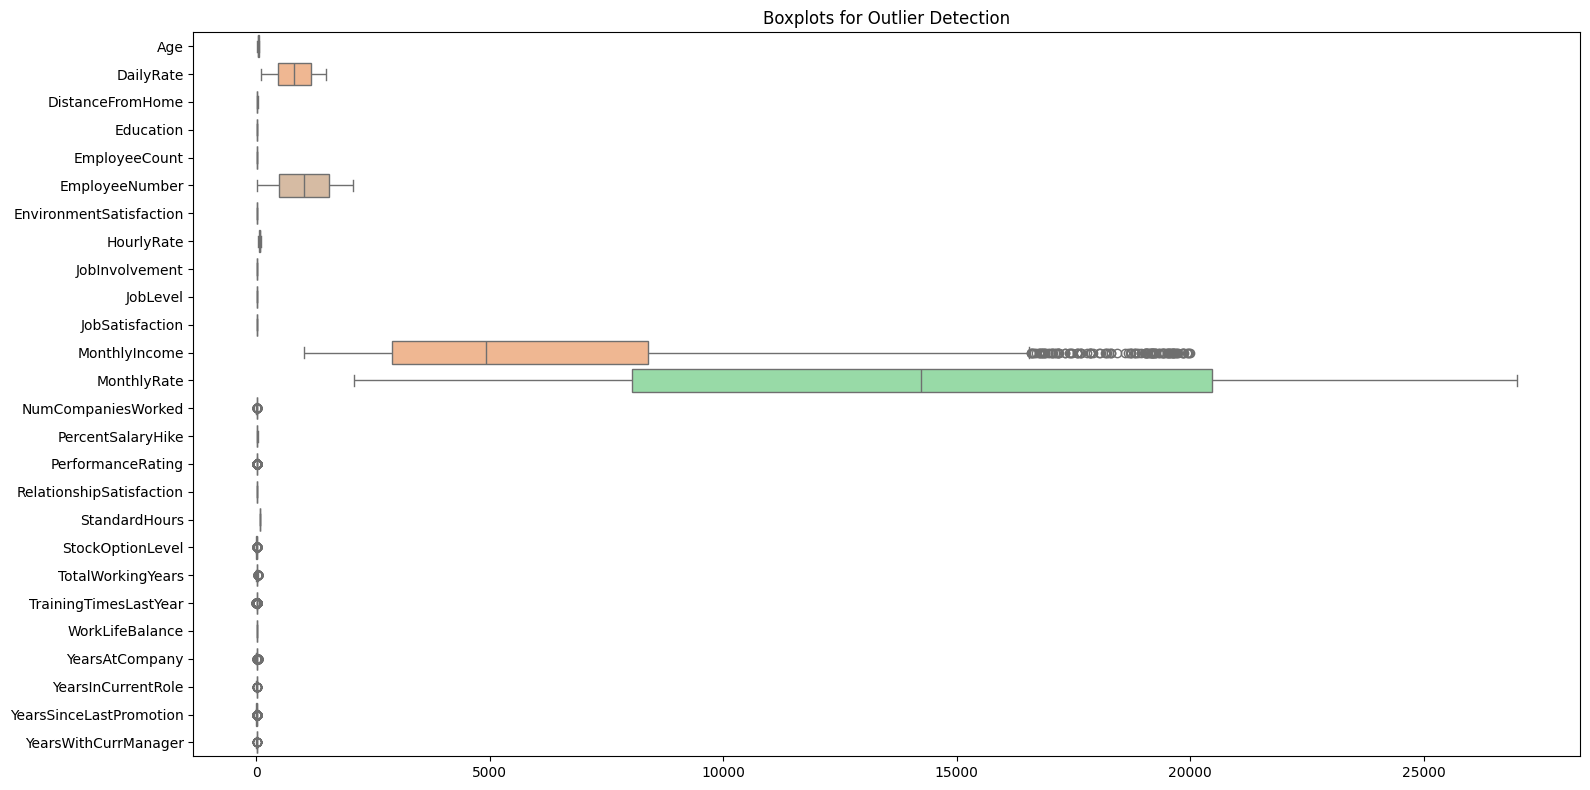

In [15]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df.select_dtypes(include=np.number), orient='h', palette="pastel")
plt.title("Boxplots for Outlier Detection")
plt.tight_layout()
plt.show()

In [16]:
max_values = df.select_dtypes(include='number').max()
min_values = df.select_dtypes(include='number').min()
print("Maximum values for numerical columns:")
print(max_values)

print("\nMinimum values for numerical columns:")
print(min_values)

Maximum values for numerical columns:
Age                            60
DailyRate                    1499
DistanceFromHome               29
Education                       5
EmployeeCount                   1
EmployeeNumber               2068
EnvironmentSatisfaction         4
HourlyRate                    100
JobInvolvement                  4
JobLevel                        5
JobSatisfaction                 4
MonthlyIncome               19999
MonthlyRate                 26999
NumCompaniesWorked              9
PercentSalaryHike              25
PerformanceRating               4
RelationshipSatisfaction        4
StandardHours                  80
StockOptionLevel                3
TotalWorkingYears              40
TrainingTimesLastYear           6
WorkLifeBalance                 4
YearsAtCompany                 40
YearsInCurrentRole             18
YearsSinceLastPromotion        15
YearsWithCurrManager           17
dtype: int64

Minimum values for numerical columns:
Age                       

In [17]:
df.drop(columns=['EmployeeCount',
       'EmployeeNumber','StandardHours','Over18'],inplace=True)

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


Feature separation


In [19]:
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})

In [20]:
y = df['Attrition']

In [21]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [22]:
X = df.drop('Attrition', axis=1)

Preprocessing-Encoding 

In [23]:
X = pd.get_dummies(X, drop_first=True).astype(int)

In [24]:
print(X.dtypes.value_counts())

int64    44
Name: count, dtype: int64


In [25]:
feature_names=X.columns.tolist()
print(feature_names)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'MaritalStatus_

In [26]:
import pickle

with open("feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f)

Data splitting

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X ,y, test_size=0.3, random_state=7, stratify=y
)

In [28]:
X_train

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
715,33,827,1,4,3,84,4,2,2,5488,...,0,0,0,0,0,0,0,1,0,1
826,38,433,1,3,3,37,4,1,3,2844,...,0,0,0,0,0,0,0,1,0,0
432,34,1303,2,4,4,62,2,1,3,2768,...,0,0,0,0,1,0,0,0,0,0
42,26,1357,25,3,1,48,1,1,3,2293,...,1,0,0,0,0,0,0,0,1,0
851,56,718,4,4,4,92,3,5,1,19943,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,50,691,2,3,3,64,3,4,3,17639,...,0,0,0,1,0,0,0,1,0,0
8,38,216,23,3,4,44,2,3,3,9526,...,0,0,1,0,0,0,0,0,1,0
880,32,116,13,3,3,77,2,1,2,2743,...,1,0,0,0,0,0,0,1,0,0
1249,29,428,9,3,2,52,1,1,2,2760,...,0,0,0,0,0,0,1,0,1,0


Sampling-SMOTETomek(under and over sampling together)

In [29]:
! pip install imblearn

In [30]:
from imblearn.combine import SMOTETomek
print("SMOTETomek imported successfully!")


SMOTETomek imported successfully!


In [31]:
smt = SMOTETomek(random_state=28)
X_train_bal, y_train_bal = smt.fit_resample(X_train, y_train)

In [32]:
X_train_bal

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,33,827,1,4,3,84,4,2,2,5488,...,0,0,0,0,0,0,0,1,0,1
1,34,1303,2,4,4,62,2,1,3,2768,...,0,0,0,0,1,0,0,0,0,0
2,26,1357,25,3,1,48,1,1,3,2293,...,1,0,0,0,0,0,0,0,1,0
3,56,718,4,4,4,92,3,5,1,19943,...,0,1,0,0,0,0,0,0,0,0
4,44,1313,7,3,2,31,3,5,4,19049,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,42,649,5,2,2,56,2,3,3,10050,...,0,0,0,0,0,1,0,0,0,0
1620,26,1342,20,3,1,36,2,1,3,2375,...,1,0,0,0,0,0,0,0,0,0
1621,29,248,26,3,2,45,2,2,2,7075,...,0,0,0,0,0,1,0,0,0,0
1622,46,738,1,2,1,97,2,2,3,5526,...,0,0,0,0,0,0,0,0,1,1


In [33]:
print("After SMOTETomek:", pd.Series(y_train_bal).value_counts())

After SMOTETomek: Attrition
0    812
1    812
Name: count, dtype: int64


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

In [35]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear',random_state=42)

lr.fit(X_train_scaled, y_train_bal)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = lr.predict(X_test_scaled)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[352  18]
 [ 33  38]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       370
           1       0.68      0.54      0.60        71

    accuracy                           0.88       441
   macro avg       0.80      0.74      0.77       441
weighted avg       0.88      0.88      0.88       441



In [38]:
lr.predict_proba(X_test_scaled)

array([[9.97331145e-01, 2.66885467e-03],
       [9.99664717e-01, 3.35283133e-04],
       [5.99397148e-01, 4.00602852e-01],
       [9.92618100e-01, 7.38189990e-03],
       [5.50784991e-01, 4.49215009e-01],
       [8.03825216e-01, 1.96174784e-01],
       [9.82076097e-01, 1.79239034e-02],
       [9.69270661e-01, 3.07293390e-02],
       [9.97507544e-01, 2.49245596e-03],
       [8.53453478e-01, 1.46546522e-01],
       [9.99450025e-01, 5.49974668e-04],
       [9.99966397e-01, 3.36031706e-05],
       [7.18237894e-01, 2.81762106e-01],
       [8.37658003e-01, 1.62341997e-01],
       [4.02785876e-01, 5.97214124e-01],
       [4.06991141e-01, 5.93008859e-01],
       [9.88228727e-01, 1.17712733e-02],
       [9.99469325e-01, 5.30674739e-04],
       [5.52352781e-02, 9.44764722e-01],
       [9.91121264e-01, 8.87873599e-03],
       [5.01851409e-01, 4.98148591e-01],
       [1.99585048e-01, 8.00414952e-01],
       [5.18987756e-01, 4.81012244e-01],
       [4.58154586e-01, 5.41845414e-01],
       [8.734356

In [39]:
df_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predicted

,Actual,Predicted
1331,0,0
1443,0,0
903,0,0
928,1,0
917,0,0
...,...,...
1034,0,0
909,0,0
450,0,0
714,0,0


In [40]:
from sklearn.metrics import accuracy_score


print(accuracy_score(y_test,y_pred))
pd.crosstab(y_test,y_pred)

0.8843537414965986


col_0,0,1
Attrition,,
0,352,18
1,33,38


In [41]:
def predict_threshold (lr,X_test_scaled,thresholds):
   import numpy as np
   return np.where(lr.predict_proba(X_test_scaled)[:,1]>thresholds,1,0)

In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix


for thr in np.arange(0,1.0,0.1):
   y_pred = predict_threshold(lr,X_test_scaled,thr)
   print("Threshold :",thr)
   print(confusion_matrix(y_test,y_pred))
   print(accuracy_score(y_test,y_pred))
   print("**********************************")

Threshold : 0.0
[[  0 370]
 [  0  71]]
0.16099773242630386
**********************************
Threshold : 0.1
[[196 174]
 [  8  63]]
0.5873015873015873
**********************************
Threshold : 0.2
[[263 107]
 [ 17  54]]
0.7188208616780045
**********************************
Threshold : 0.30000000000000004
[[306  64]
 [ 21  50]]
0.8072562358276644
**********************************
Threshold : 0.4
[[332  38]
 [ 28  43]]
0.8503401360544217
**********************************
Threshold : 0.5
[[352  18]
 [ 33  38]]
0.8843537414965986
**********************************
Threshold : 0.6000000000000001
[[360  10]
 [ 44  27]]
0.8775510204081632
**********************************
Threshold : 0.7000000000000001
[[364   6]
 [ 49  22]]
0.8752834467120182
**********************************
Threshold : 0.8
[[368   2]
 [ 56  15]]
0.8684807256235828
**********************************
Threshold : 0.9
[[369   1]
 [ 67   4]]
0.8458049886621315
**********************************


In [43]:
with open("lr_model.pkl", "wb") as f:
    pickle.dump(lr, f)

In [48]:
! pip install streamlit 

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.9 MB 1.3 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/9.9 MB 1.3 MB/s eta 0:00:07
   ------- -------------------------------- 1.8/9.9 MB 1.3 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.9 MB 1.2 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/9.9 MB 1.2 MB/s eta 0:00:07
   ----------- ---------------------------- 2.9/9.9 MB 1.2 MB/s eta 0:00:07
   ------------- -------------------------- 3.4/9.9 MB 1.1 MB/s eta 0:00:07
   -------------- ------------------------- 3.7/9.9 MB 1.0 MB/s eta 0:00:07
   --------------- ------------------------ 3.9/9.9 MB 1.0 MB/s eta 0:00:06
   ------------------ --------------------- 4.7/9.9 MB 998.5 kB/s eta 0:00:06
   ---------------------- ----------------- 5.5/9.9 MB 958.5 kB/s eta 0:00:05
   -------------------

In [49]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np
import pandas as pd

st.set_page_config(page_title="Employee Attrition Predictor", layout="centered")
st.title("👤 Employee Attrition Prediction")

# ------------------------------
# Load model, scaler, features
# ------------------------------
with open("lr_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("feature_names.pkl", "rb") as f:
    feature_names = pickle.load(f)

# ------------------------------
# Input form
# ------------------------------
st.header("Enter employee details below:")

# Numeric inputs
Age = st.slider("Age", 18, 60, 30)
DailyRate = st.slider("Daily Rate", 100, 1500, 800)
DistanceFromHome = st.slider("Distance From Home (km)", 1, 30, 5)
Education = st.slider("Education Level (1-Low to 5-High)", 1, 5, 3)
EnvironmentSatisfaction = st.slider("Environment Satisfaction (1-4)", 1, 4, 3)
HourlyRate = st.slider("Hourly Rate", 30, 100, 60)
JobInvolvement = st.slider("Job Involvement (1-4)", 1, 4, 3)
JobLevel = st.slider("Job Level (1-5)", 1, 5, 2)
JobSatisfaction = st.slider("Job Satisfaction (1-4)", 1, 4, 3)
MonthlyIncome = st.slider("Monthly Income", 1000, 50000, 10000)
NumCompaniesWorked = st.slider("Num Companies Worked", 0, 10, 2)
PercentSalaryHike = st.slider("Percent Salary Hike", 10, 25, 15)
PerformanceRating = st.slider("Performance Rating (1-4)", 1, 4, 3)
RelationshipSatisfaction = st.slider("Relationship Satisfaction (1-4)", 1, 4, 3)
StockOptionLevel = st.slider("Stock Option Level (0-3)", 0, 3, 1)
TotalWorkingYears = st.slider("Total Working Years", 0, 40, 5)
TrainingTimesLastYear = st.slider("Training Times Last Year", 0, 6, 2)
WorkLifeBalance = st.slider("Work Life Balance (1-4)", 1, 4, 3)
YearsAtCompany = st.slider("Years At Company", 0, 40, 5)
YearsInCurrentRole = st.slider("Years In Current Role", 0, 20, 5)
YearsSinceLastPromotion = st.slider("Years Since Last Promotion", 0, 15, 2)
YearsWithCurrManager = st.slider("Years With Current Manager", 0, 15, 3)

# Categorical dropdowns
Department = st.selectbox("Department", ['Research & Development', 'Sales', 'Human Resources'])
EducationField = st.selectbox("Education Field", ['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources', 'Other'])
Gender = st.selectbox("Gender", ['Male', 'Female'])
MaritalStatus = st.selectbox("Marital Status", ['Single', 'Married', 'Divorced'])
OverTime = st.selectbox("OverTime", ['Yes', 'No'])
BusinessTravel = st.selectbox("Business Travel", ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'])
JobRole = st.selectbox("Job Role", ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources'])

# ------------------------------
# Prediction
# ------------------------------
if st.button("🔮 Predict"):
    input_dict = {
        'Age': Age,
        'DailyRate': DailyRate,
        'DistanceFromHome': DistanceFromHome,
        'Education': Education,
        'EnvironmentSatisfaction': EnvironmentSatisfaction,
        'HourlyRate': HourlyRate,
        'JobInvolvement': JobInvolvement,
        'JobLevel': JobLevel,
        'JobSatisfaction': JobSatisfaction,
        'MonthlyIncome': MonthlyIncome,
        'NumCompaniesWorked': NumCompaniesWorked,
        'PercentSalaryHike': PercentSalaryHike,
        'PerformanceRating': PerformanceRating,
        'RelationshipSatisfaction': RelationshipSatisfaction,
        'StockOptionLevel': StockOptionLevel,
        'TotalWorkingYears': TotalWorkingYears,
        'TrainingTimesLastYear': TrainingTimesLastYear,
        'WorkLifeBalance': WorkLifeBalance,
        'YearsAtCompany': YearsAtCompany,
        'YearsInCurrentRole': YearsInCurrentRole,
        'YearsSinceLastPromotion': YearsSinceLastPromotion,
        'YearsWithCurrManager': YearsWithCurrManager,

        f'Department_{Department}': 1,
        f'EducationField_{EducationField}': 1,
        f'Gender_{Gender}': 1,
        f'MaritalStatus_{MaritalStatus}': 1,
        f'OverTime_{OverTime}': 1,
        f'BusinessTravel_{BusinessTravel}': 1,
        f'JobRole_{JobRole}': 1
    }

    # Prepare input DataFrame
    input_df = pd.DataFrame(columns=feature_names)
    input_df.loc[0] = 0
    for key, value in input_dict.items():
        if key in input_df.columns:
            input_df.at[0, key] = value

    # Scale
    numeric_cols = input_df.columns[input_df.dtypes != 'uint8']
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])

    # Predict
    threshold = 0.5
    prob = model.predict_proba(input_df)[0][1]
    prediction = 1 if prob >= threshold else 0

    # Output
    st.subheader("🎯 Prediction Result")
    st.markdown(f"**Attrition Probability:** `{prob:.2f}`")

    if prediction == 1:
        st.error("⚠️ Will the employee leave? → **Yes**")
    else:
        st.success("✅ Will the employee leave? → **No**")

Overwriting app.py


In [50]:
!streamlit run app.py

^C
